# Project 3 - Part 1 - Chicago Crime Data

# Topics 2, 4, and 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)



In [2]:
!pip install holidays

In [3]:
import holidays
import datetime as dt
from holidays import country_holidays



In [4]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax



In [5]:

folder = "Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [6]:
#df = pd.read_csv('YOUR PATH',low_memory=False)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


ID                    Date     Primary Type          Description  \
0  1326041  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  1319931  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  1324743  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  1310717  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  1318099  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0                RESIDENCE   False     False  1624      16.0   NaN  41.957850   
1                RESIDENCE   False      True   825       8.0   NaN  41.783892   
2                   STREET    True     False   313       3.0   NaN  41.780412   
3                   STREET   False     False  2424      24.0   NaN  42.012391   
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN  41.819538   

   Longitude  
0 -87.749185  
1 -87.684841  
2 -87.611970  
3 -87.678032  
4 -87.620020

In [7]:
df.tail()

ID                    Date        Primary Type  \
238853  12938029  12/31/2022 12:50:00 PM             ASSAULT   
238854  12937822  12/31/2022 12:50:00 PM             ASSAULT   
238855  12937583  12/31/2022 12:52:00 AM             BATTERY   
238856  12938420  12/31/2022 12:52:00 PM             ASSAULT   
238857  12939906  12/31/2022 12:59:00 PM  DECEPTIVE PRACTICE   

                                    Description          Location Description  \
238853                                   SIMPLE                     APARTMENT   
238854                     AGGRAVATED - HANDGUN                     APARTMENT   
238855                                   SIMPLE                    BARBERSHOP   
238856                                   SIMPLE  COMMERCIAL / BUSINESS OFFICE   
238857  FINANCIAL IDENTITY THEFT $300 AND UNDER                     RESIDENCE   

        Arrest  Domestic  Beat  District  Ward   Latitude  Longitude  
238853   False     False  1014      10.0  24.0  41.855911 -87.719966  
238854   False      True   733       7.0   6.0  41.766546 -87.645669  
238855   False     False  1135      11.0  28.0  41.868829 -87.686098  
238856   False     False  1432      14.0  32.0  41.930693 -87.685657  
238857   False     False  1511      15.0  29.0        NaN        NaN

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y %I:%M:%S %p') #use format = in to_datetime string to speed things up


In [9]:
# how many null values did we create?
df['Date'].isna().sum()



0

In [10]:
df_reg_index = df

In [11]:
## now that we remove NaT's let's make our datetime index
df = df.set_index('Date')
df.head(3)


ID Primary Type          Description  \
Date                                                             
2001-01-01 01:00:00  1326041      BATTERY               SIMPLE   
2001-01-01 13:00:00  1319931      BATTERY               SIMPLE   
2001-01-01 13:00:00  1324743     GAMBLING  ILLEGAL ILL LOTTERY   

                    Location Description  Arrest  Domestic  Beat  District  \
Date                                                                         
2001-01-01 01:00:00            RESIDENCE   False     False  1624      16.0   
2001-01-01 13:00:00            RESIDENCE   False      True   825       8.0   
2001-01-01 13:00:00               STREET    True     False   313       3.0   

                     Ward   Latitude  Longitude  
Date                                             
2001-01-01 01:00:00   NaN  41.957850 -87.749185  
2001-01-01 13:00:00   NaN  41.783892 -87.684841  
2001-01-01 13:00:00   NaN  41.780412 -87.611970

In [12]:
df = df.sort_index()
df.index


DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:47:00', '2022-12-31 23:50:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

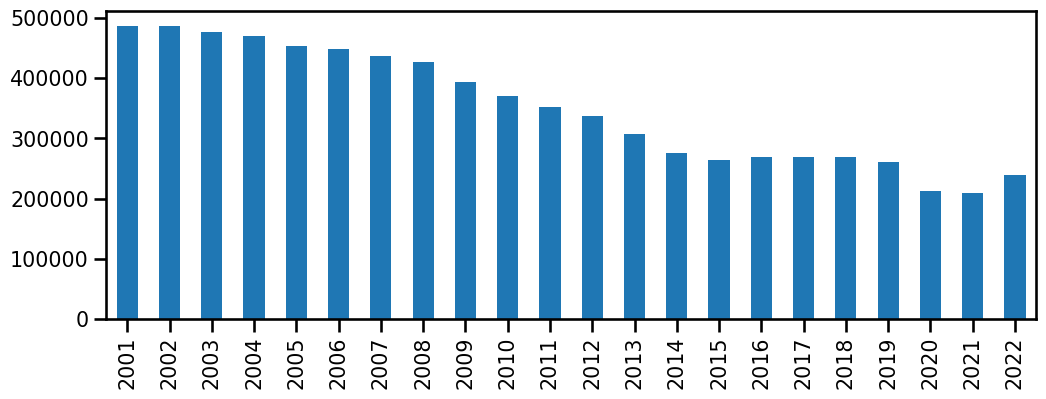

In [13]:
years = df.index.year
years.value_counts().sort_index().plot(kind='bar');


In [14]:
## Inspect the value_counts for the different types of crimes
df['Primary Type'].value_counts()



THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

In [15]:
# Combine non  - criminal with non-criminal and criminal sexual assault with crim sexual assault

#Replace all instances of n0n - criminal: ,str.replace all undesired instances with desired instances

In [16]:
df_temp = df

<Axes: >

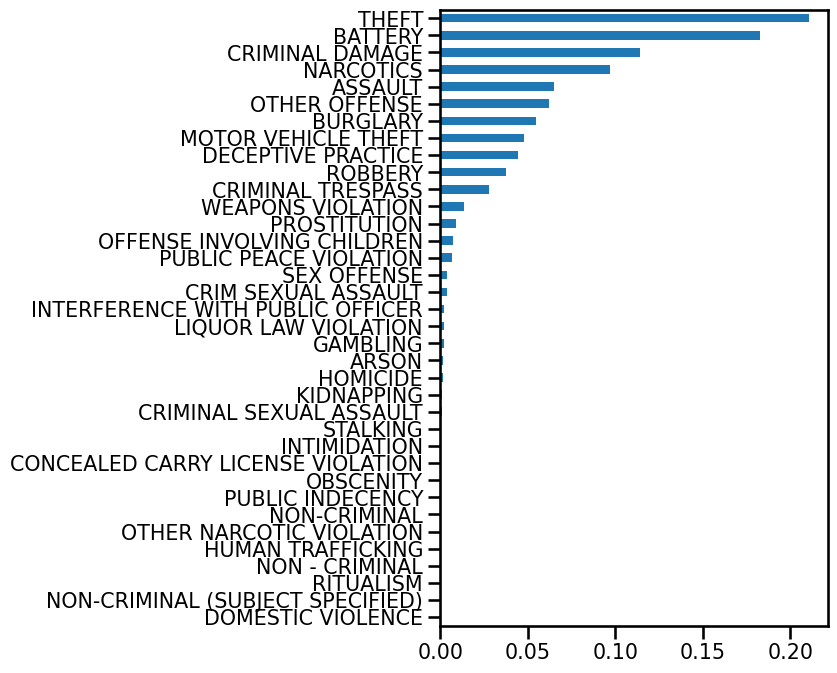

In [17]:
## Inspect the value_counts for the different types of crimes
crime_counts = df_temp['Primary Type'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))


In [18]:
df_temp.groupby("Primary Type").size()



Primary Type
ARSON                                  13121
ASSAULT                               501103
BATTERY                              1410889
BURGLARY                              422246
CONCEALED CARRY LICENSE VIOLATION       1019
CRIM SEXUAL ASSAULT                    27584
CRIMINAL DAMAGE                       878914
CRIMINAL SEXUAL ASSAULT                 6353
CRIMINAL TRESPASS                     212869
DECEPTIVE PRACTICE                    340958
DOMESTIC VIOLENCE                          1
GAMBLING                               14616
HOMICIDE                               12394
HUMAN TRAFFICKING                         96
INTERFERENCE WITH PUBLIC OFFICER       18206
INTIMIDATION                            4595
KIDNAPPING                              7185
LIQUOR LAW VIOLATION                   14846
MOTOR VEHICLE THEFT                   366586
NARCOTICS                             746155
NON - CRIMINAL                            38
NON-CRIMINAL                             1

In [19]:
## Engineering Features using components of the date/time
df_temp['Year']  = df.index.year
df_temp['Year']


Date
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
                       ... 
2022-12-31 23:47:00    2022
2022-12-31 23:47:00    2022
2022-12-31 23:50:00    2022
2022-12-31 23:50:00    2022
2022-12-31 23:55:00    2022
Name: Year, Length: 7713109, dtype: int64

In [20]:
# II. Resample the temp DataFrame as Yearly data (crime counts)
# and keep ONLY the .size()
df_temp_Y = df_temp.resample("Y").size()
df_temp_Y


Date
2001-12-31    485886
2002-12-31    486807
2003-12-31    475985
2004-12-31    469422
2005-12-31    453773
2006-12-31    448179
2007-12-31    437087
2008-12-31    427183
2009-12-31    392827
2010-12-31    370513
2011-12-31    351993
2012-12-31    336319
2013-12-31    307536
2014-12-31    275789
2015-12-31    264787
2016-12-31    269823
2017-12-31    269100
2018-12-31    268899
2019-12-31    261325
2020-12-31    212194
2021-12-31    208824
2022-12-31    238858
Freq: A-DEC, dtype: int64

In [21]:
# 1. get list of  unique crime descriptions
crime_list = df_temp['Primary Type'].unique()
crime_list



array(['THEFT', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT',
       'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE',
       'BATTERY', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION',
       'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS',
       'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE',
       'GAMBLING', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'ARSON',
       'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

In [22]:
# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df_temp.loc[ df['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("Y").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()



dict_keys(['THEFT', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE', 'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT', 'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'BATTERY', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS', 'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE', 'GAMBLING', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

## Topic 2: 
Crimes Across the Years:

Is the total number of crimes increasing or decreasing across the year Overall crime is decreasing with a slight bump in 2022. s?
Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-ve Yes, while many crime types had an increase in numbers around 2022, concealed carry violations, weapons violations, stalking, homicide and human trafficking saw fairly consistent increases over several years.a)?

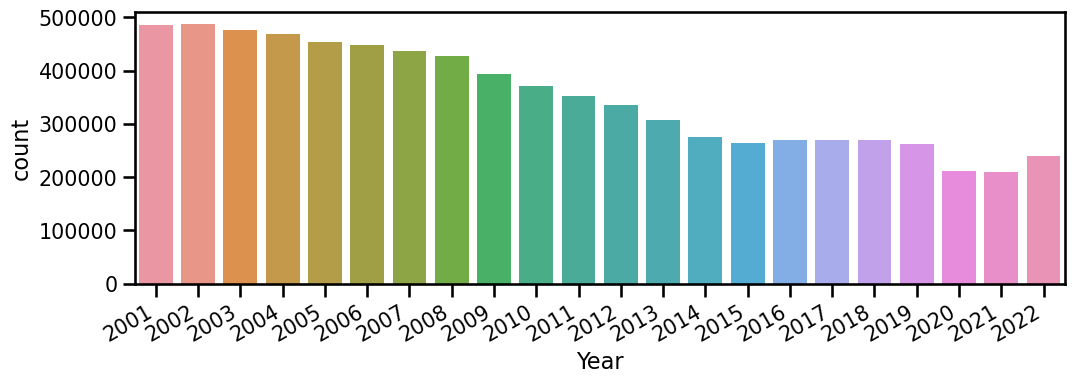

In [23]:
## Visualize years
ax = sns.countplot(data=df_temp_Y, x=df['Year'])
fig = ax.get_figure()
fig.autofmt_xdate()



In [24]:
## Get # of crimes by Year
crimes_by_year = df_temp.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year



Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2018    5456
                   2019    6339
                   2020    8432
                   2021    8980
                   2022    8766
Name: Year, Length: 689, dtype: int64

In [25]:
## convert to dataframe and reset_index()
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df



Primary Type  Year  # of Crimes
0                ARSON  2001         1011
1                ARSON  2002         1032
2                ARSON  2003          955
3                ARSON  2004          778
4                ARSON  2005          691
..                 ...   ...          ...
684  WEAPONS VIOLATION  2018         5456
685  WEAPONS VIOLATION  2019         6339
686  WEAPONS VIOLATION  2020         8432
687  WEAPONS VIOLATION  2021         8980
688  WEAPONS VIOLATION  2022         8766

[689 rows x 3 columns]

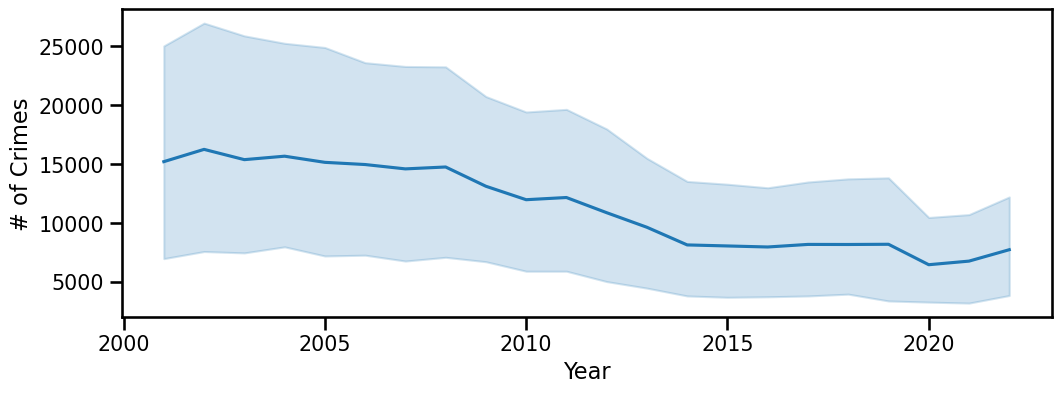

In [26]:
ax = sns.lineplot(data=plot_df, x='Year',y='# of Crimes')



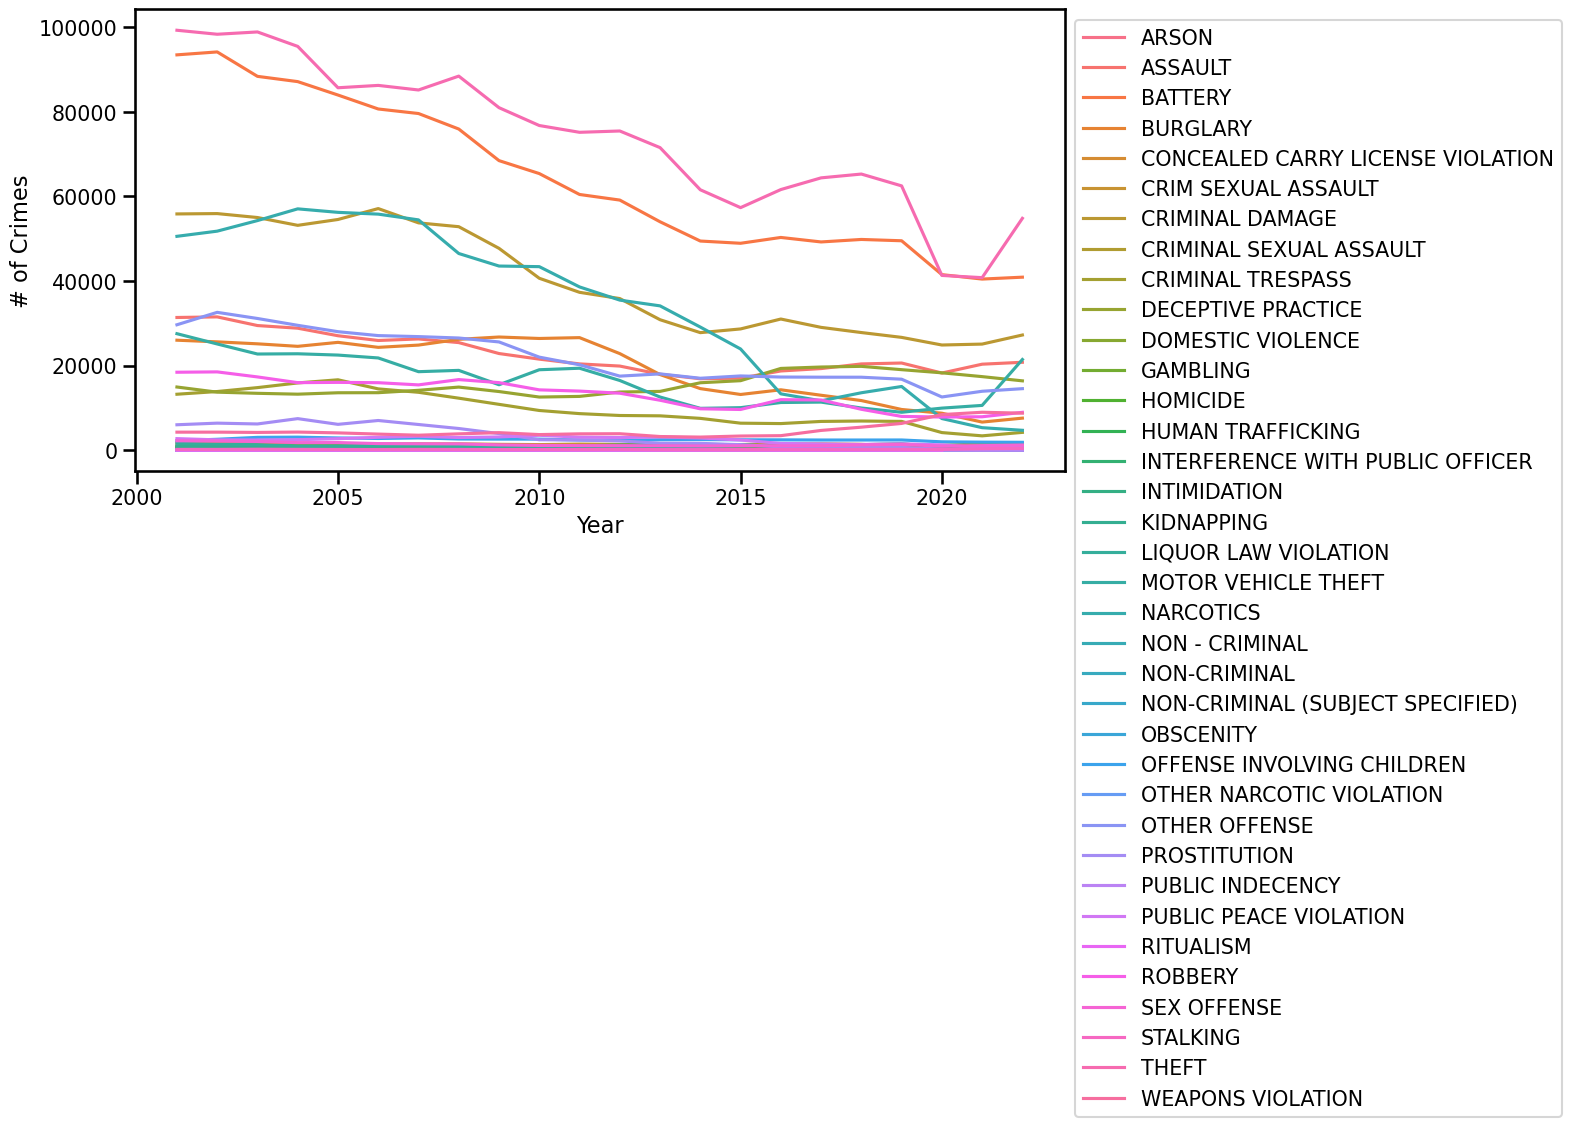

In [27]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_df, x='Year',y='# of Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);


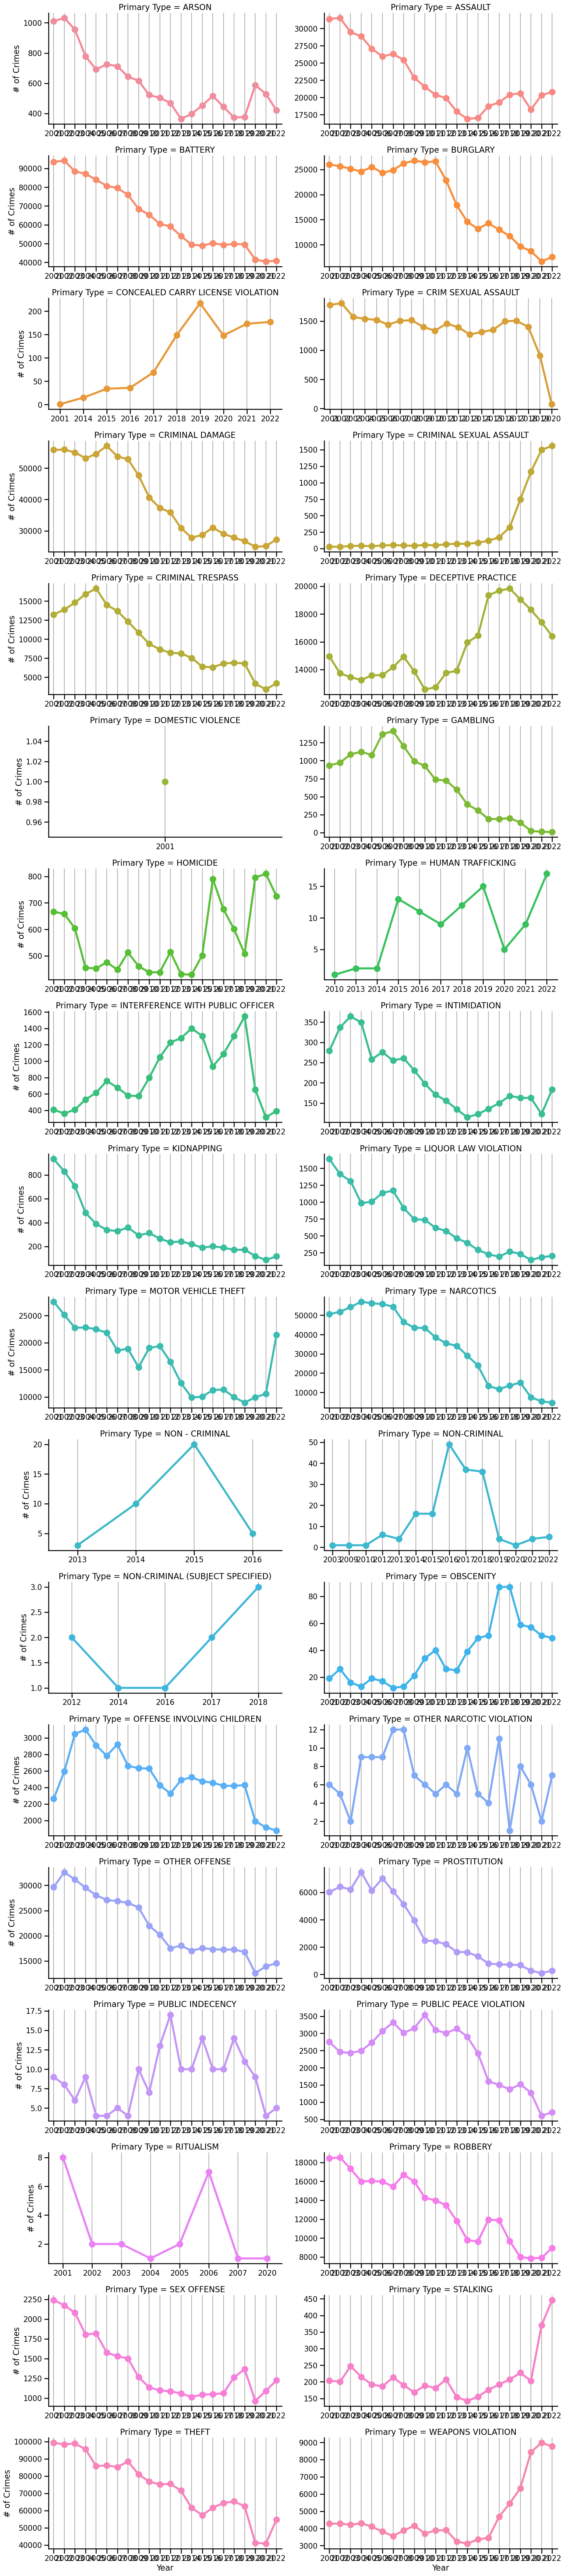

In [28]:
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];



## Topic 4: 
Comparing Months:
Answer the question: ​What months have the most crime? What months have the least The warmer/summer months tend to have the most crime with the colder winter months having the least. July has the most crime, while February has the least.
?
Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crime Narcotics, deceptive practice, motor vehicle theft, and obscenity crimes deviate from the above pattern.s?

In [29]:
df_temp2 = df

In [30]:
df_temp2['Month']  = df.index.month
df_temp2['Month']

Date
2001-01-01 00:00:00     1
2001-01-01 00:00:00     1
2001-01-01 00:00:00     1
2001-01-01 00:00:00     1
2001-01-01 00:00:00     1
                       ..
2022-12-31 23:47:00    12
2022-12-31 23:47:00    12
2022-12-31 23:50:00    12
2022-12-31 23:50:00    12
2022-12-31 23:55:00    12
Name: Month, Length: 7713109, dtype: int64

In [31]:
# II. Resample the temp DataFrame as Monthly data (crime counts)
# and keep ONLY the .size()
df_temp_M = df_temp2.resample("M").size()
df_temp_M

Date
2001-01-31    38119
2001-02-28    33787
2001-03-31    40566
2001-04-30    40091
2001-05-31    41839
              ...  
2022-08-31    22293
2022-09-30    22318
2022-10-31    23195
2022-11-30    20776
2022-12-31    19875
Freq: M, Length: 264, dtype: int64

In [32]:
crimes_by_month = df_temp2.groupby("Month")['Primary Type'].value_counts(normalize=False)
crimes_by_month



Month  Primary Type                    
1      THEFT                               123454
       BATTERY                             101302
       NARCOTICS                            65943
       CRIMINAL DAMAGE                      62574
       OTHER OFFENSE                        42162
                                            ...  
12     OTHER NARCOTIC VIOLATION                 8
       HUMAN TRAFFICKING                        4
       RITUALISM                                3
       NON - CRIMINAL                           1
       NON-CRIMINAL (SUBJECT SPECIFIED)         1
Name: Primary Type, Length: 415, dtype: int64

In [33]:
crimes_by_month_totals = df_temp2.groupby("Month")['Primary Type'].size()
crimes_by_month_totals

Month
1     601236
2     529391
3     629704
4     627175
5     682932
6     681739
7     717232
8     710444
9     668242
10    676285
11    608961
12    579768
Name: Primary Type, dtype: int64

In [34]:
# convert to dataframe and reset_index()
plot_df = crimes_by_month_totals.to_frame('# of Crimes').reset_index()

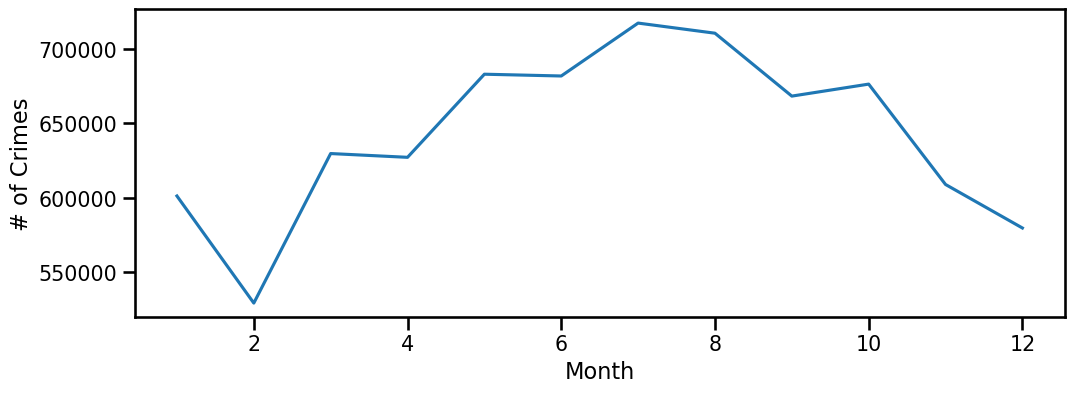

In [35]:
ax = sns.lineplot(data=plot_df, x='Month',y='# of Crimes')

# Sort by Primary Type

In [36]:
# convert to dataframe and reset_index()
plot_df2 = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_df2



Month                      Primary Type  # of Crimes
0        1                             THEFT       123454
1        1                           BATTERY       101302
2        1                         NARCOTICS        65943
3        1                   CRIMINAL DAMAGE        62574
4        1                     OTHER OFFENSE        42162
..     ...                               ...          ...
410     12          OTHER NARCOTIC VIOLATION            8
411     12                 HUMAN TRAFFICKING            4
412     12                         RITUALISM            3
413     12                    NON - CRIMINAL            1
414     12  NON-CRIMINAL (SUBJECT SPECIFIED)            1

[415 rows x 3 columns]

In [37]:
crimes_by_month.head()

Month  Primary Type   
1      THEFT              123454
       BATTERY            101302
       NARCOTICS           65943
       CRIMINAL DAMAGE     62574
       OTHER OFFENSE       42162
Name: Primary Type, dtype: int64

In [38]:
plot_df2.head()

Month     Primary Type  # of Crimes
0      1            THEFT       123454
1      1          BATTERY       101302
2      1        NARCOTICS        65943
3      1  CRIMINAL DAMAGE        62574
4      1    OTHER OFFENSE        42162

"\n## loop throught the axes dict\nfor col, ax in g.axes_dict.items():\n    \n    ## Extract the idx min and idxmax from the val counts\n    min_, max_ = plot_df2.loc[col].agg(['idxmin','idxmax'])\n    \n    ## add vlines for both and SAVE THE LINE and a label to use in legend\n    ln1 = ax.axvline(min_, color='darkgreen',ls='--')\n    lab1 = f'Min(Month={min_})'\n    \n    ln2 = ax.axvline(max_,color='darkred',ls='--')\n    lab2 = f'Max(Month={max_})'\n    \n    ## manually add legend using list of ln1 and ln2 and a list of labels\n    ax.legend( [ln1,ln2], [lab1,lab2] )\n    ## add x grid\n    ax.grid(axis='x')\n    \ng.fig\n"

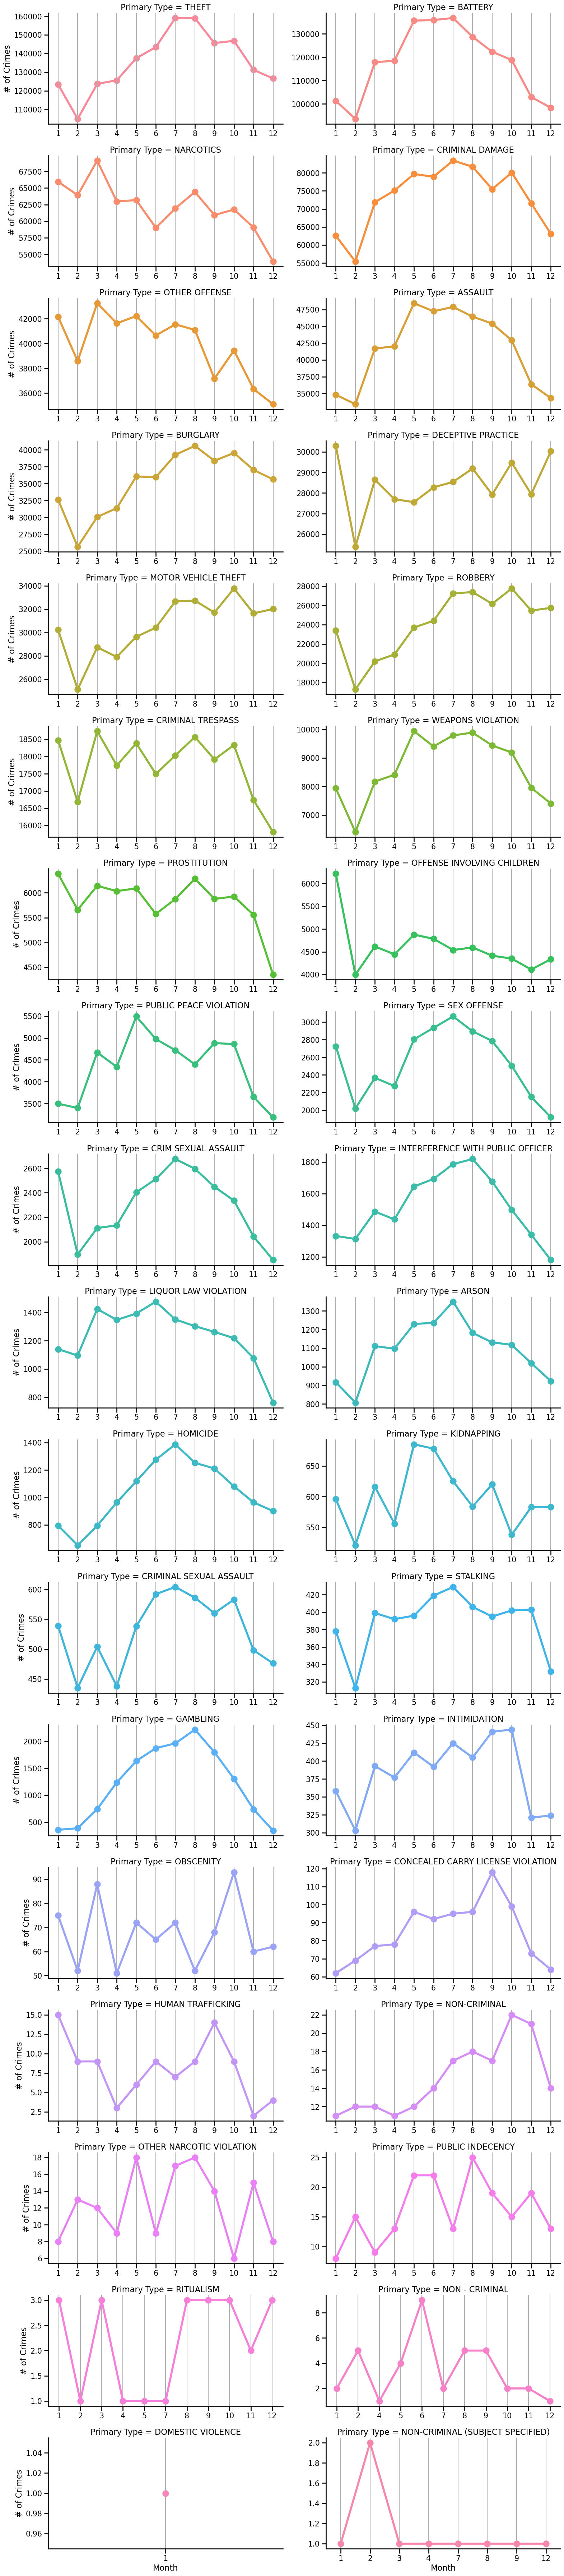

In [39]:
g = sns.catplot(data=plot_df2, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

'''
## loop throught the axes dict
for col, ax in g.axes_dict.items():
    
    ## Extract the idx min and idxmax from the val counts
    min_, max_ = plot_df2.loc[col].agg(['idxmin','idxmax'])
    
    ## add vlines for both and SAVE THE LINE and a label to use in legend
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Month={min_})'
    
    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Month={max_})'
    
    ## manually add legend using list of ln1 and ln2 and a list of labels
    ax.legend( [ln1,ln2], [lab1,lab2] )
    ## add x grid
    ax.grid(axis='x')
    
g.fig
'''
#Dataframe may be structured differently; check notes from LP. See if dictionary of CRIMES changes df structure

## Topic 5:
Comparing Holidays:
Answer the question: ​What are the top 3 holidays with the largest number of crimes The holidays with the most crimes New Year's Day, Independence Day, and Labor Day.?
Answer the question:  For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holida Battery, Theft, and Criminal Damage are the top 3 crimes for each holiday.y?

In [40]:
'''
## making a date range that covers full dataset
all_days = pd.date_range(df_reg_index["Date"].min(), df_reg_index["Date"].max())
all_days
'''


'\n## making a date range that covers full dataset\nall_days = pd.date_range(df_reg_index["Date"].min(), df_reg_index["Date"].max())\nall_days\n'

In [41]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays



holidays.country_holidays('US')

In [42]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])



NameError: name 'all_days' is not defined

In [43]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in df_reg_index["Date"]]



In [44]:
df_reg_index["US Holiday"] = holiday_list

In [45]:
holiday_crimes = df_reg_index.groupby('US Holiday')['Primary Type'].size().sort_values(ascending = False)
holiday_crimes = holiday_crimes.to_frame('# of Crimes')
holiday_crimes.head(3)


# of Crimes
US Holiday                   
New Year's Day          32725
Independence Day        22672
Labor Day               22164

In [46]:
'''
ax = sns.barplot(data=holiday_crimes, x = 'US Holiday', y="# of Crimes", estimator=np.sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
#Could not get this to work
'''

'\nax = sns.barplot(data=holiday_crimes, x = \'US Holiday\', y="# of Crimes", estimator=np.sum)\nax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha=\'right\');\n#Could not get this to work\n'

# Breakdown of Holidays with the most Crime

## The holidays with the most crimes New Year's Day, Independence Day, and Labor Day. Battery, Theft, and Criminal Damage are the top 3 crimes for each holiday.

In [47]:
holiday_crimes_index = holiday_crimes.index[0:3]

In [48]:
holiday_mask = df_reg_index["US Holiday"].isin(holiday_crimes_index)  #Use.head().method() to speed up testing

In [49]:
df_reg_index[holiday_mask]

ID                Date         Primary Type  \
0        1326041 2001-01-01 01:00:00              BATTERY   
1        1319931 2001-01-01 13:00:00              BATTERY   
2        1324743 2001-01-01 13:00:00             GAMBLING   
3        1310717 2001-01-01 01:00:00      CRIMINAL DAMAGE   
4        1318099 2001-01-01 01:00:00              BATTERY   
...          ...                 ...                  ...   
156571  12817241 2022-09-05 12:45:00              BATTERY   
156572  12817070 2022-09-05 12:50:00  MOTOR VEHICLE THEFT   
156573  12816591 2022-09-05 00:53:00                THEFT   
156574  12817577 2022-09-05 00:54:00        OTHER OFFENSE   
156575  12816662 2022-09-05 00:55:00        OTHER OFFENSE   

                        Description     Location Description  Arrest  \
0                            SIMPLE                RESIDENCE   False   
1                            SIMPLE                RESIDENCE   False   
2               ILLEGAL ILL LOTTERY                   STREET    True   
3                        TO VEHICLE                   STREET   False   
4                            SIMPLE  RESIDENCE PORCH/HALLWAY   False   
...                             ...                      ...     ...   
156571                       SIMPLE                 SIDEWALK   False   
156572                   AUTOMOBILE                   STREET   False   
156573                 RETAIL THEFT       SMALL RETAIL STORE   False   
156574      HARASSMENT BY TELEPHONE                APARTMENT   False   
156575  VIOLATE ORDER OF PROTECTION                RESIDENCE   False   

        Domestic  Beat  District  Ward   Latitude  Longitude      US Holiday  
0          False  1624      16.0   NaN  41.957850 -87.749185  New Year's Day  
1           True   825       8.0   NaN  41.783892 -87.684841  New Year's Day  
2          False   313       3.0   NaN  41.780412 -87.611970  New Year's Day  
3          False  2424      24.0   NaN  42.012391 -87.678032  New Year's Day  
4           True   214       2.0   NaN  41.819538 -87.620020  New Year's Day  
...          ...   ...       ...   ...        ...        ...             ...  
156571     False   624       6.0   6.0  41.750240 -87.610054       Labor Day  
156572     False   414       4.0   8.0  41.752616 -87.582113       Labor Day  
156573     False  1733      17.0  33.0  41.950737 -87.707930       Labor Day  
156574     False  1821      18.0   2.0  41.905601 -87.632156       Labor Day  
156575      True   634       6.0  21.0  41.724390 -87.627525       Labor Day  

[77561 rows x 13 columns]

In [50]:
mask1 = df_reg_index["US Holiday"] == holiday_crimes_index[0]
df_reg_index[mask1]["Primary Type"].value_counts().head(3)

THEFT              6845
BATTERY            6043
CRIMINAL DAMAGE    3236
Name: Primary Type, dtype: int64

In [51]:
mask2 = df_reg_index["US Holiday"] == holiday_crimes_index[1]
df_reg_index[mask2]["Primary Type"].value_counts().head(3)

BATTERY            5805
THEFT              4074
CRIMINAL DAMAGE    3309
Name: Primary Type, dtype: int64

In [52]:
mask3 = df_reg_index["US Holiday"] == holiday_crimes_index[2]
df_reg_index[mask3]["Primary Type"].value_counts().head(3)

BATTERY            4607
THEFT              4520
CRIMINAL DAMAGE    2475
Name: Primary Type, dtype: int64

# Part 2:ARIMA/SARIMA Analysis

In [63]:
import pmdarima as pm

In [64]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs

# Set wide fig size for plots
plt.rcParams['figure.figsize']=(12,3)

In [65]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [66]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [68]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig

In [ ]:
# Total Crime (sum of all crime types)

In [60]:
df_ts_total = df.resample("M").size()
df_ts_total

Date
2001-01-31    38119
2001-02-28    33787
2001-03-31    40566
2001-04-30    40091
2001-05-31    41839
              ...  
2022-08-31    22293
2022-09-30    22318
2022-10-31    23195
2022-11-30    20776
2022-12-31    19875
Freq: M, Length: 264, dtype: int64

In [61]:
df_ts_total.isna().sum().sum()

0

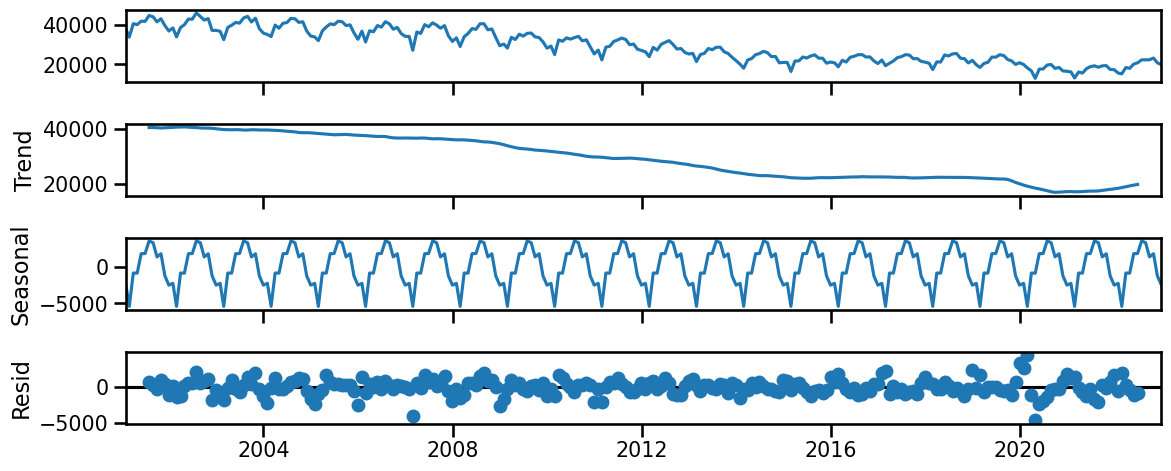

In [69]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(df_ts_total)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

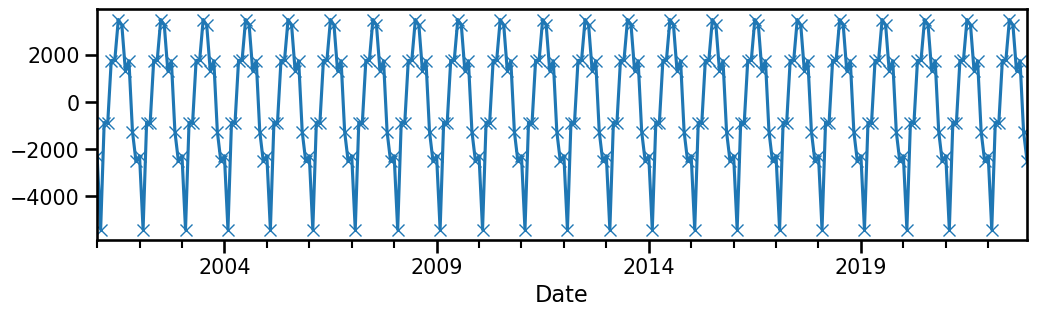

In [72]:
# Narrow down the date range of the plot
seasonal = decomp.seasonal
ax = seasonal.plot(marker = 'x')

In [75]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(df_ts_total.max()-df_ts_total.min()) * 100 :.2f}% of the variation in time series.")

#Add this to other model analysis to confirm seasonality

The seasonal component is 8897.744047619048 which is ~26.89% of the variation in time series.


In [ ]:
### This data appears to be seasonal. m = 12

In [76]:
# Check for stationarity
get_adfuller_results(df_ts_total)

Test Statistic  # of Lags Used  # of Observations   p-value  alpha  \
adfuller       -1.325784              15                248  0.617295   0.05   

          sig/stationary?  
adfuller            False

In [77]:
# determine d
d = ndiffs(df_ts_total)
print (f'd = {d}')
# determine D
D = nsdiffs(df_ts_total, m = 12)
print (f'D = {D}')

d = 1
D = 0


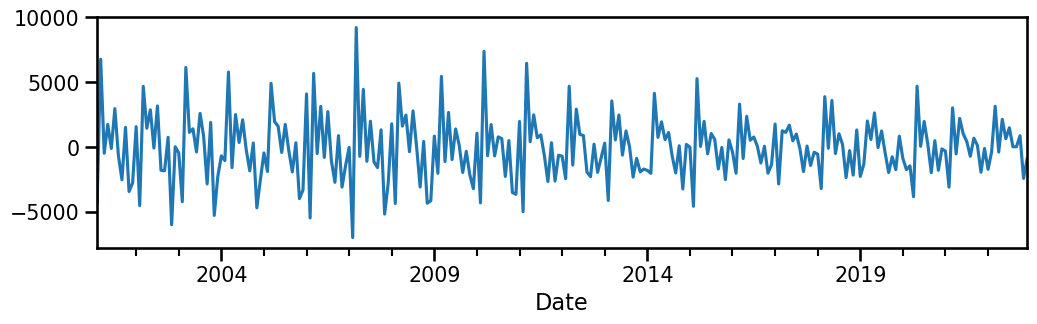

In [78]:
# apply both differencings
ts_diff = df_ts_total.diff().dropna()
ts_diff.plot();

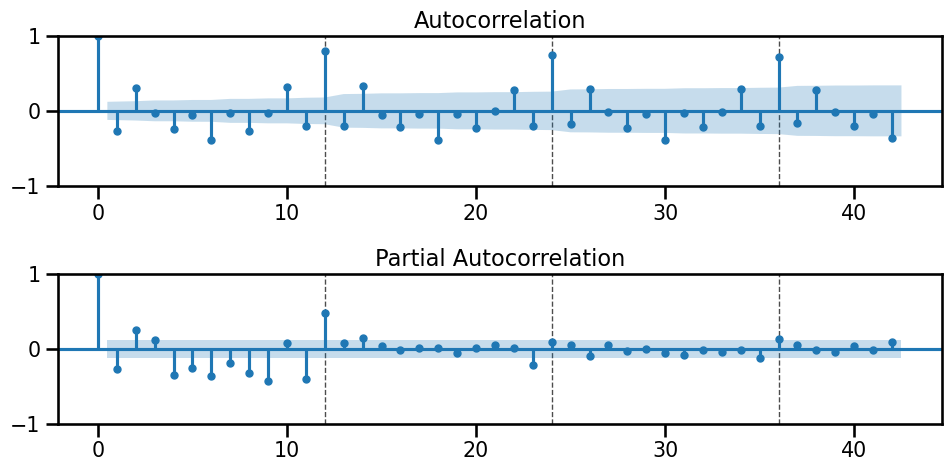

In [85]:
# now look at the acf/pacf of the stationary data
plot_acf_pacf(ts_diff, annotate_seas = True, m = 12, nlags = 21*2);

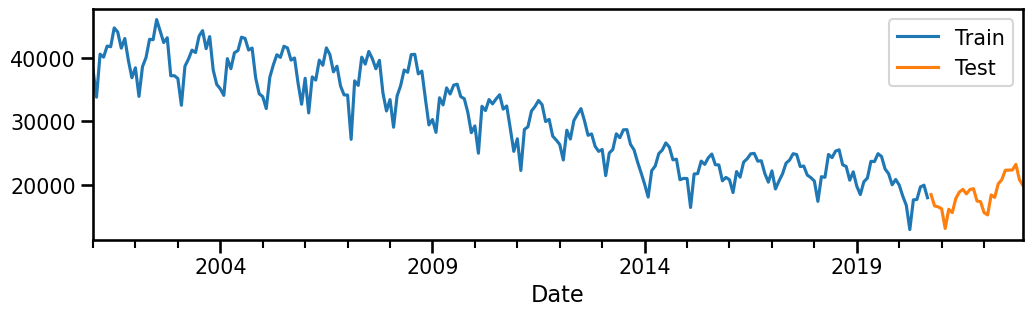

In [105]:
# tts
train, test = train_test_split(df_ts_total, test_size=.10)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();


In [106]:
# Orders for non seasonal components
p = 1 # nonseasonal AR
d = 1  # nonseasonal differencing
q = 3  # nonseasonal MA


arima = tsa.ARIMA(train, order = (p,d,q)).fit()

# Obtain summary
arima.summary()

C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  237
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -2153.688
Date:                Fri, 03 Nov 2023   AIC                           4317.376
Time:                        01:35:04   BIC                           4334.696
Sample:                    01-31-2001   HQIC                          4324.358
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7414      0.074      9.965      0.000       0.596       0.887
ma.L1         -0.9741      0.081    -12.028      0.000      -1.133      -0.815
ma.L2          0.5031      0.065      7.759      0.000       0.376       0.630
ma.L3         -0.4068      0.046     -8.779      0.000      -0.498      -0.316
sigma2      4.802e+06   4.54e+05     10.581      0.000    3.91e+06    5.69e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.49   Prob(JB):                         0.67
Heteroskedasticity (H):               0.41   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

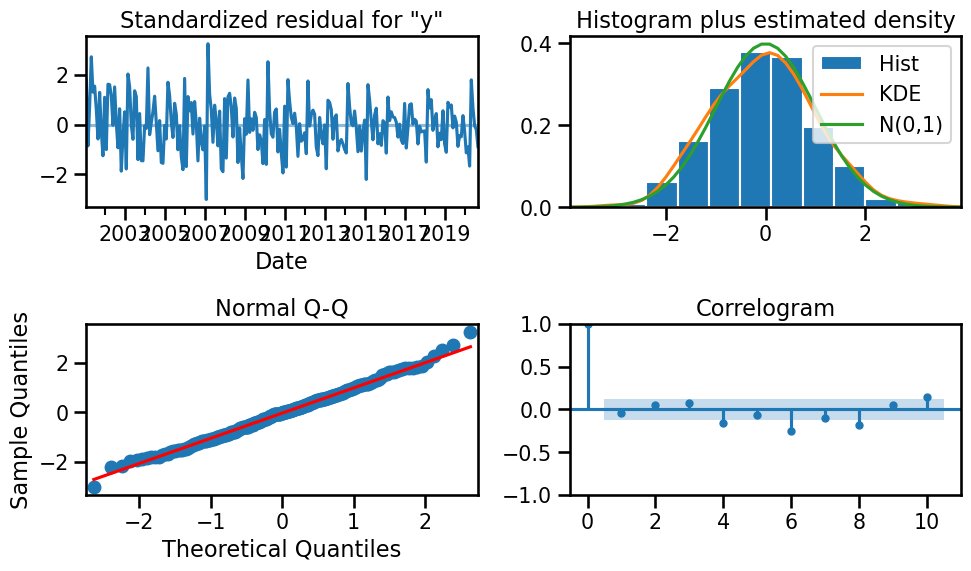

In [107]:
# Obtain diagnostic plots
fig = arima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1,838.493
- MSE = 5,303,735.797
- RMSE = 2,302.984
- R^2 = 0.107
- MAPE = 10.36%


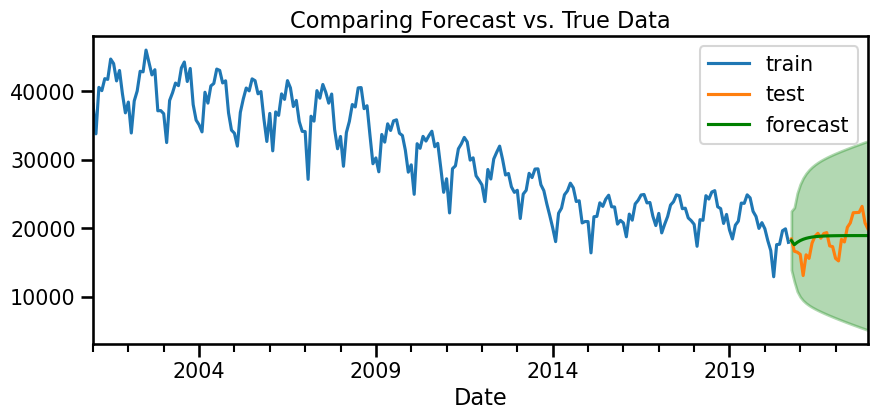

In [108]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = arima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

## Auto-ARIMA

In [109]:
#Bigger training set and smaller testing set
# Play with parameters...or don't
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=False,
    trace=True
)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4330.598, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4380.572, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4363.958, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4370.330, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4378.834, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4330.451, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4328.519, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4330.145, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4357.179, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4332.049, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4326.861, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4368.422, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4328.785, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=4327.987, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [110]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)

(3, 1, 4)
(0, 0, 0, 0)


In [111]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  237
Model:               SARIMAX(3, 1, 4)   Log Likelihood               -2132.406
Date:                Fri, 03 Nov 2023   AIC                           4280.812
Time:                        01:36:16   BIC                           4308.522
Sample:                    01-31-2001   HQIC                          4291.982
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0353      0.143      7.225      0.000       0.754       1.316
ar.L2          0.1920      0.245      0.785      0.432      -0.287       0.671
ar.L3         -0.6695      0.140     -4.790      0.000      -0.943      -0.396
ma.L1         -1.4858      0.147    -10.093      0.000      -1.774      -1.197
ma.L2          0.4218      0.322      1.311      0.190      -0.209       1.053
ma.L3          0.5345      0.274      1.947      0.051      -0.003       1.072
ma.L4         -0.2173      0.085     -2.569      0.010      -0.383      -0.052
sigma2      3.421e+06   8.38e-08   4.08e+13      0.000    3.42e+06    3.42e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                14.21
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.96e+29. Standard errors may be unstable.
"""

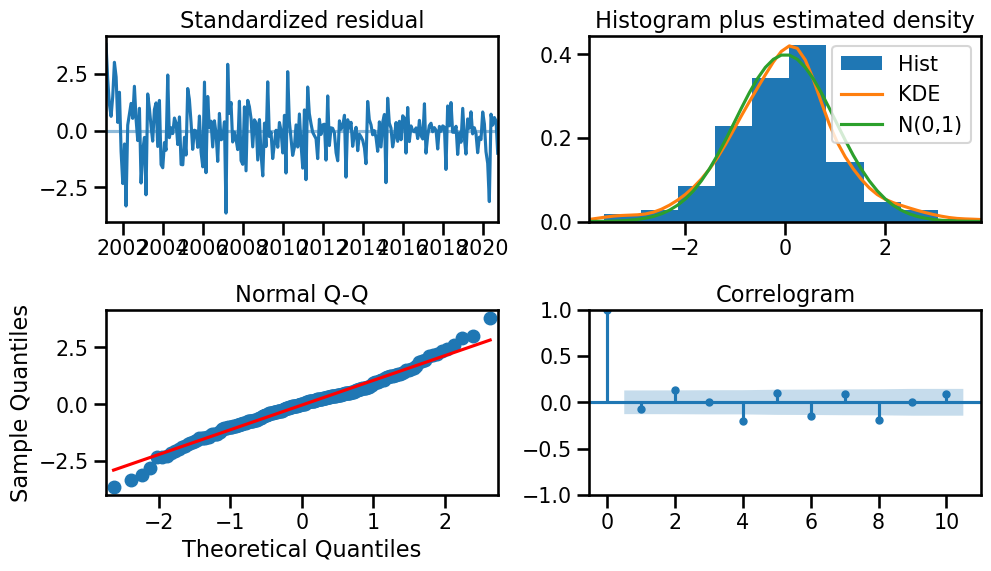

In [112]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1,707.585
- MSE = 5,198,492.695
- RMSE = 2,280.020
- R^2 = 0.125
- MAPE = 8.67%


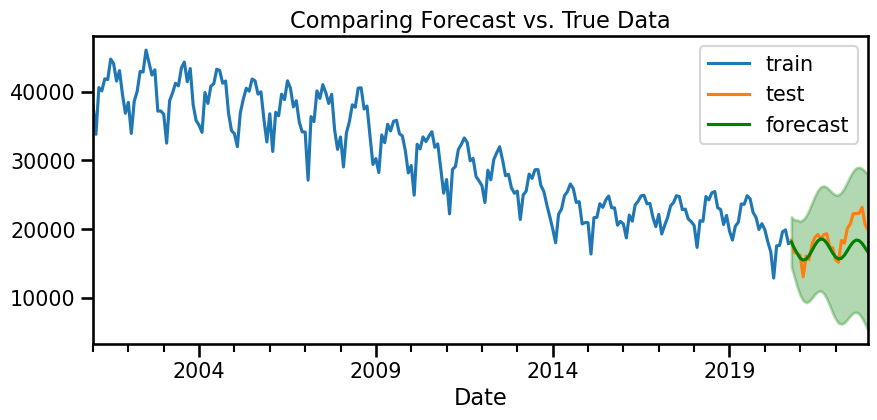

In [113]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])


In [115]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 1  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(df_ts_total, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

In [116]:
len(test)

27

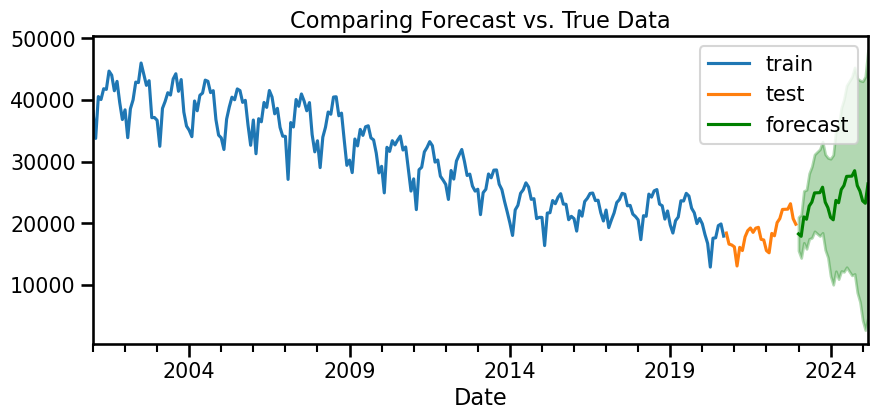

In [117]:
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);


In [118]:
forecast_df.index[0],forecast_df.index[-1]

(Timestamp('2023-01-31 00:00:00', freq='M'),
 Timestamp('2025-03-31 00:00:00', freq='M'))

In [119]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

18299.44310525384

In [120]:
final_value = forecast_df['mean'].iloc[-1]
final_value

26419.025251792464

In [121]:
change = final_value - starting_value
change

8119.582146538625

In [122]:
perc_change = (change / starting_value) * 100
perc_change

44.37065160855886

### I would chose the auto-ARIME model with the parameters ARIMA(3,1,4)(0,0,0)[0] It ended up with a MAPE of 8.67% vs 10.36% in the previous model and the forecast fits the test data a little more closely. Although with more time, I would experiment to get a better fitting model.)

# Narcotics

In [131]:
df_ts_temp = df.groupby("Primary Type").resample("M").size()
df_ts_narcotics = df_ts_temp["NARCOTICS"]
df_ts_narcotics

Date
2001-01-31    4714
2001-02-28    4369
2001-03-31    4862
2001-04-30    4044
2001-05-31    4038
              ... 
2022-08-31     420
2022-09-30     379
2022-10-31     358
2022-11-30     339
2022-12-31     325
Length: 264, dtype: int64

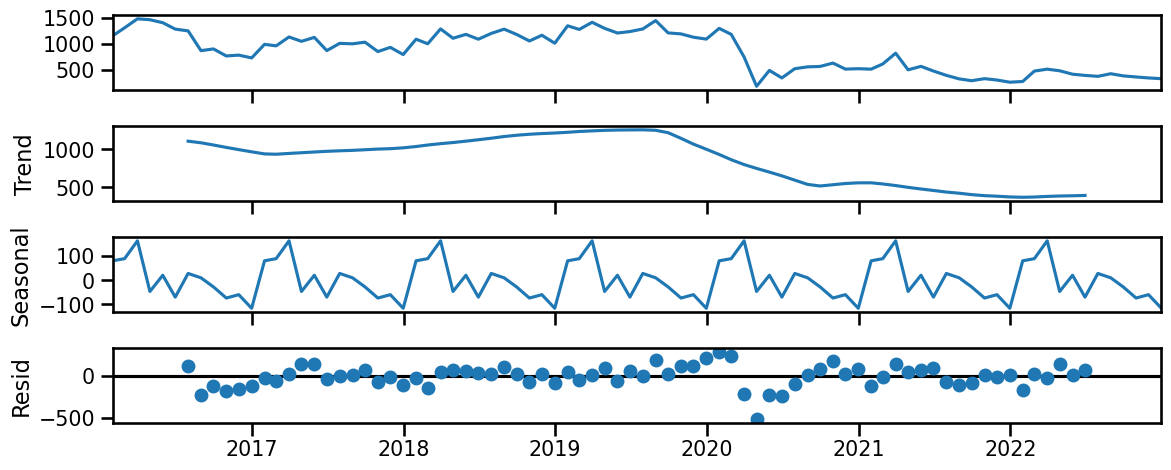

In [135]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(df_ts_narcotics)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

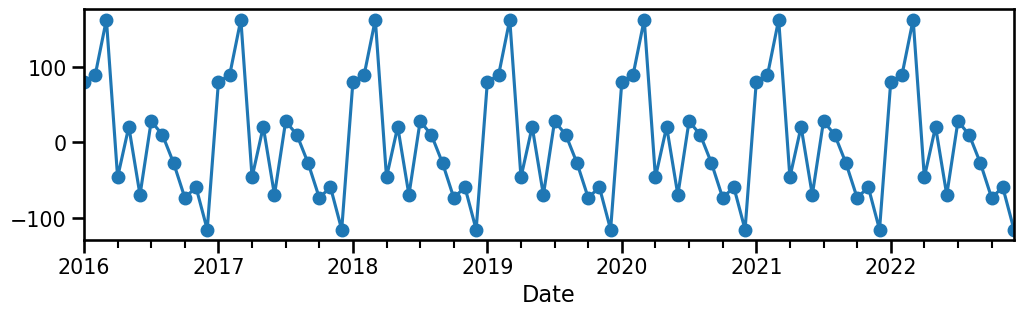

In [136]:
# Narrow down the date range of the plot
seasonal = decomp.seasonal
ax = seasonal.plot(marker = 'o')

In [137]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(df_ts_narcotics.max()-df_ts_narcotics.min()) * 100 :.2f}% of the variation in time series.")


The seasonal component is 278.41666666666674 which is ~4.93% of the variation in time series.


The data is likely not seasonal.

In [138]:
# Check for stationarity
get_adfuller_results(df_ts_narcotics)

Test Statistic  # of Lags Used  # of Observations   p-value  alpha  \
adfuller        0.265472              12                251  0.975704   0.05   

          sig/stationary?  
adfuller            False

In [139]:
# determine d
d = ndiffs(df_ts_narcotics)
print (f'd = {d}')
# determine D
D = nsdiffs(df_ts_narcotics, m = 12)
print (f'D = {D}')

d = 1
D = 0


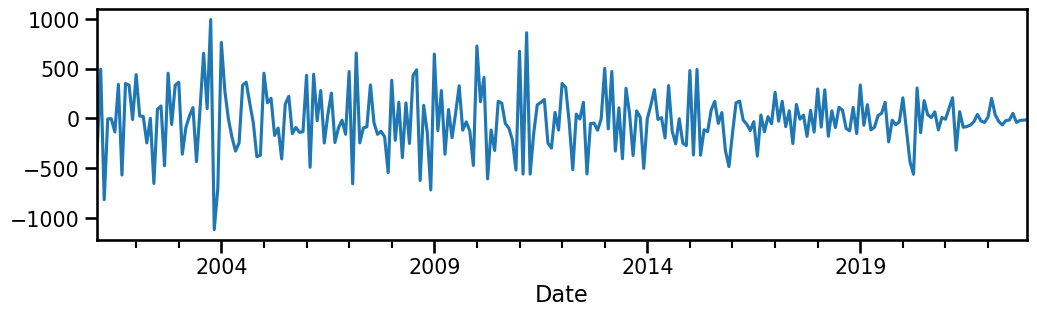

In [141]:
# apply both differencings
ts_diff2 = df_ts_narcotics.diff().dropna()
ts_diff2.plot();

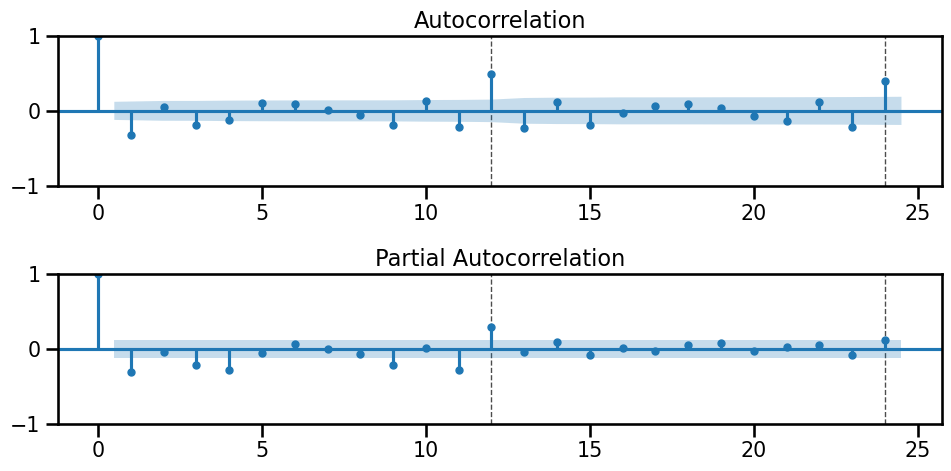

In [145]:
# now look at the acf/pacf of the stationary data
plot_acf_pacf(ts_diff2, annotate_seas = True, m = 12, nlags = 6*4);

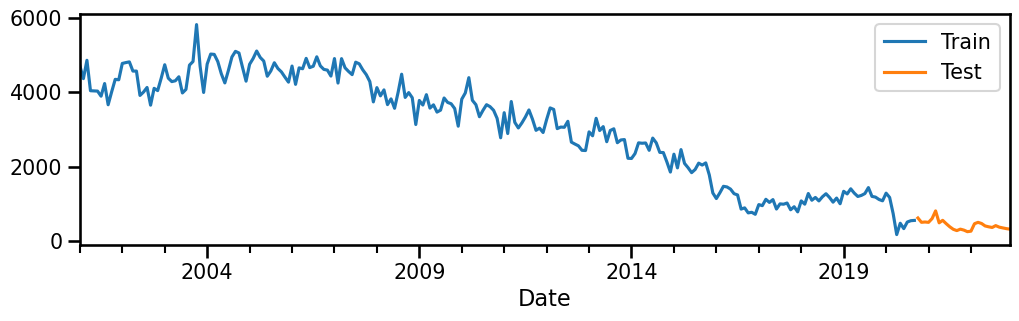

In [150]:
# tts
train, test = train_test_split(df_ts_narcotics, test_size=.10)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();


In [173]:
# Orders for non seasonal components
p = 0  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 3  # nonseasonal MA


arima2 = tsa.ARIMA(train, order = (p,d,q)).fit()

# Obtain summary
arima2.summary()

C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  237
Model:                 ARIMA(0, 2, 3)   Log Likelihood               -1668.901
Date:                Fri, 03 Nov 2023   AIC                           3345.802
Time:                        02:08:11   BIC                           3359.640
Sample:                    01-31-2001   HQIC                          3351.381
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.4557      0.058    -25.305      0.000      -1.568      -1.343
ma.L2          0.3025      0.094      3.234      0.001       0.119       0.486
ma.L3          0.1573      0.052      3.007      0.003       0.055       0.260
sigma2      8.357e+04   6575.235     12.710      0.000    7.07e+04    9.65e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                12.16
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

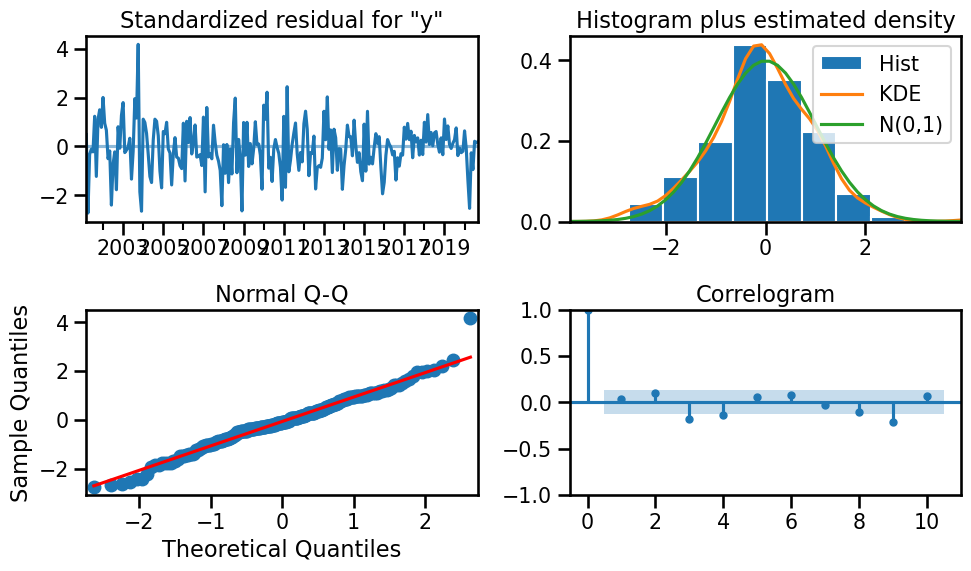

In [174]:
# Obtain diagnostic plots
fig = arima2.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 201.709
- MSE = 59,033.981
- RMSE = 242.969
- R^2 = -2.782
- MAPE = 47.60%


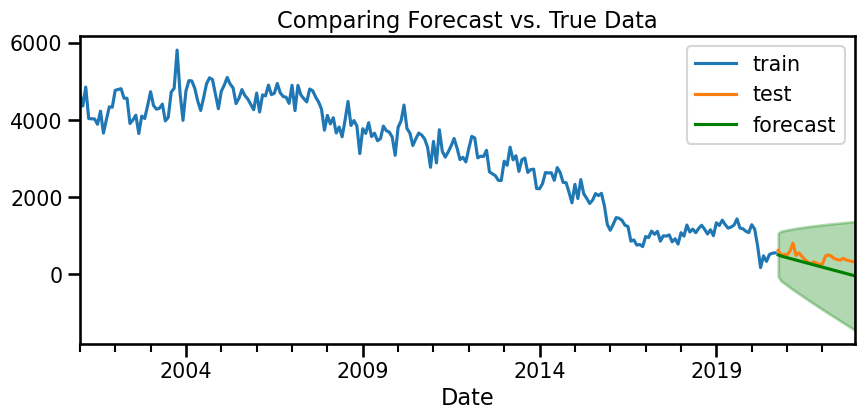

In [175]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = arima2.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

## Auto-ARIMA

In [177]:
#Bigger training set and smaller testing set
# Play with parameters...or don't
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=False,
    trace=True
)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3387.132, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3363.370, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3356.549, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3385.874, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3346.635, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3347.603, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3348.156, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3351.841, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3364.997, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3350.569, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.788 seconds


In [178]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)

(1, 1, 1)
(0, 0, 0, 0)


In [179]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  237
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1669.318
Date:                Fri, 03 Nov 2023   AIC                           3346.635
Time:                        02:08:50   BIC                           3360.491
Sample:                    01-31-2001   HQIC                          3352.221
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -9.9956      4.222     -2.367      0.018     -18.271      -1.720
ar.L1          0.3824      0.089      4.274      0.000       0.207       0.558
ma.L1         -0.8026      0.062    -12.897      0.000      -0.925      -0.681
sigma2       8.16e+04   6305.907     12.941      0.000    6.92e+04     9.4e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                13.68
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

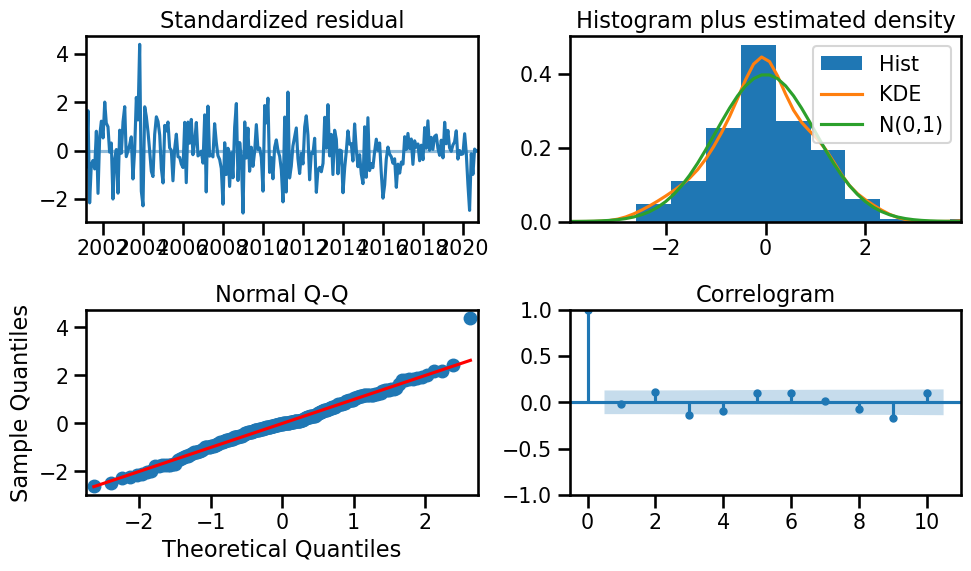

In [180]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 177.421
- MSE = 40,158.724
- RMSE = 200.396
- R^2 = -1.573
- MAPE = 49.55%


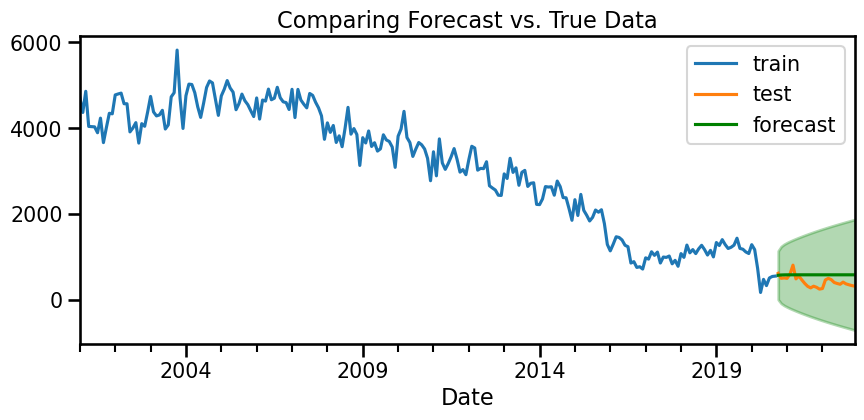

In [181]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])


In [183]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 1  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(df_ts_narcotics, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [184]:
len(test)

27

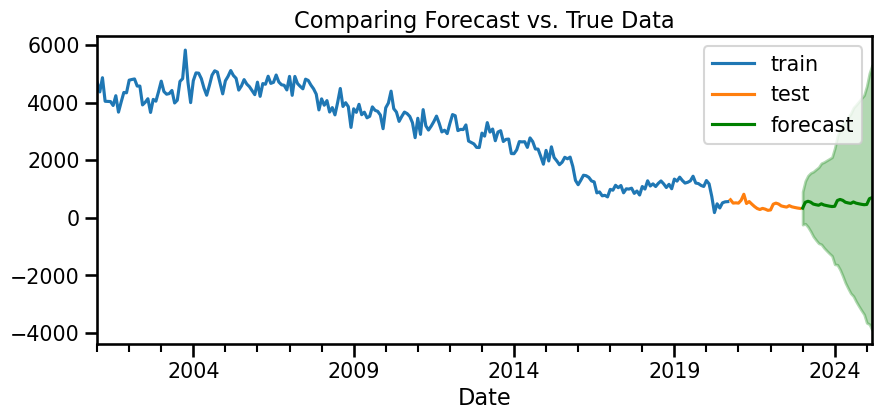

In [185]:
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);


In [186]:
forecast_df.index[0],forecast_df.index[-1]

(Timestamp('2023-01-31 00:00:00', freq='M'),
 Timestamp('2025-03-31 00:00:00', freq='M'))

In [187]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

334.08650177093756

In [188]:
final_value = forecast_df['mean'].iloc[-1]
final_value

699.4374552814943

In [189]:
change = final_value - starting_value
change

365.35095351055674

In [190]:
perc_change = (change / starting_value) * 100
perc_change

109.35819064041542

I would choose the [0,2,3] model as it had the lowest MAPE and a downward trending line. However all of the forecasts for this model ended up being stright lines and I am unsure why.

Final Evaluation:

After completing both models and getting the forecasts for both crimes for 6 months into the future (beyond the data), answer the following questions in a Markdown cell:

Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forec The total number of crimes. This and the next question are kind of moot for my analysis.ast?
Of the two crimes, which is forecasted to have the highest net change by the end of the fore The total number of crimes.cast?
Of the two crimes, which is forecasted to have the highest percent change by the end of the for Narcotics at 109% vs the total rise of 44%ecast?
Final Recommendations

What recommendation would you make to the stak Overall crime is expected to go up by 44% from mid-2020 levels but not all crimes are going to rise. Narcotics is one crime type that is expecting high growth and should be watched. eholders?
Include reporting-quality visual(s) to support your recom

![image](Data/Capture.PNG)mendation.